# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------



In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:


```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*


In [20]:
import csv
import sklearn
import spacy
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

df = pd.read_csv("semantic_word_pairs.csv")


w1 = set(df["Word1"])
w2 = set(df["Word2"])

intersection = w1.intersection(w2)
print(f"Wspólne słowa w Word1 i Word2: {sorted(intersection)}")

rows = []

for _, row in df.iterrows():
    rows.append({"Word": row["Word1"], "Class": row["Class"]})
    rows.append({"Word": row["Word2"], "Class": row["Class"]})

words_df = pd.DataFrame(rows)

Wspólne słowa w Word1 i Word2: []


In [21]:
# Załaduj model
nlp = spacy.load("en_core_web_lg")

words_df["embeddings"] = words_df["Word"].apply(lambda word: nlp(word).vector)

# Przygotuj macierz wektorów do PCA
embedding_matrix = np.vstack(words_df["embeddings"].values)

# Redukcja wymiarowości
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Dodaj wyniki PCA do DataFrame
words_df[["PC1", "PC2"]] = reduced_embeddings

# Teraz możesz wyświetlić wyniki
print(words_df[["Word", "Class", "PC1", "PC2"]])

       Word            Class       PC1       PC2
0      king           Gender -2.544619 -0.029532
1     queen           Gender -2.571741  0.535193
2       man           Gender -1.571867  0.846720
3     woman           Gender -2.352891  1.611984
4       boy           Gender -2.039654  1.762042
..      ...              ...       ...       ...
95    stand  Motion / Action  0.742629 -0.608120
96     push  Motion / Action  1.890618 -0.664440
97     pull  Motion / Action  1.757203 -0.366781
98    climb  Motion / Action  1.890944 -0.909079
99  descend  Motion / Action  0.437028 -2.053656

[100 rows x 4 columns]


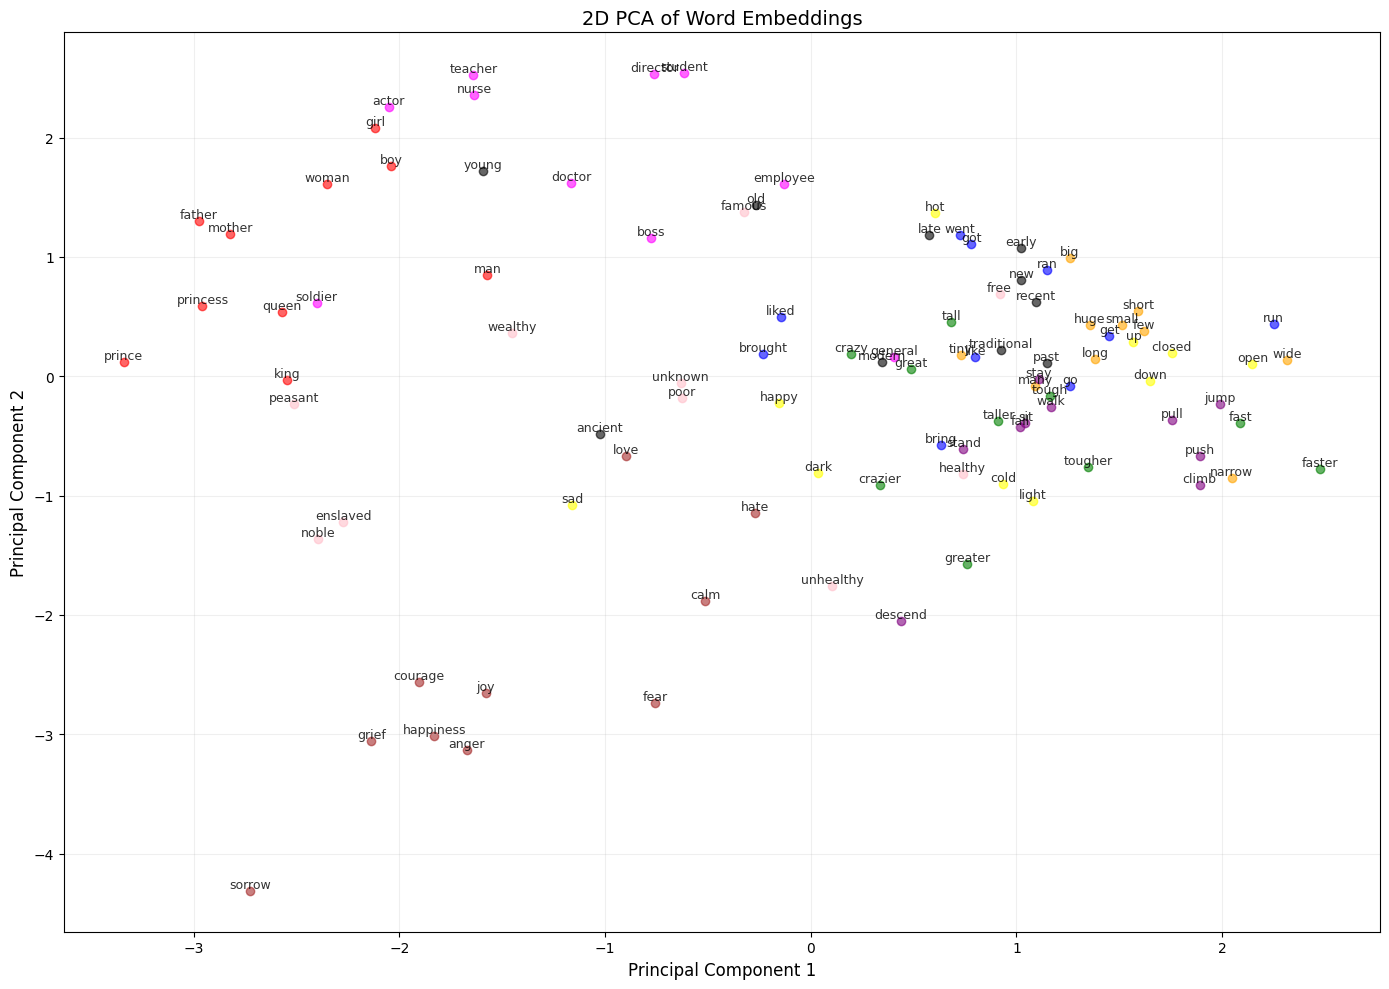

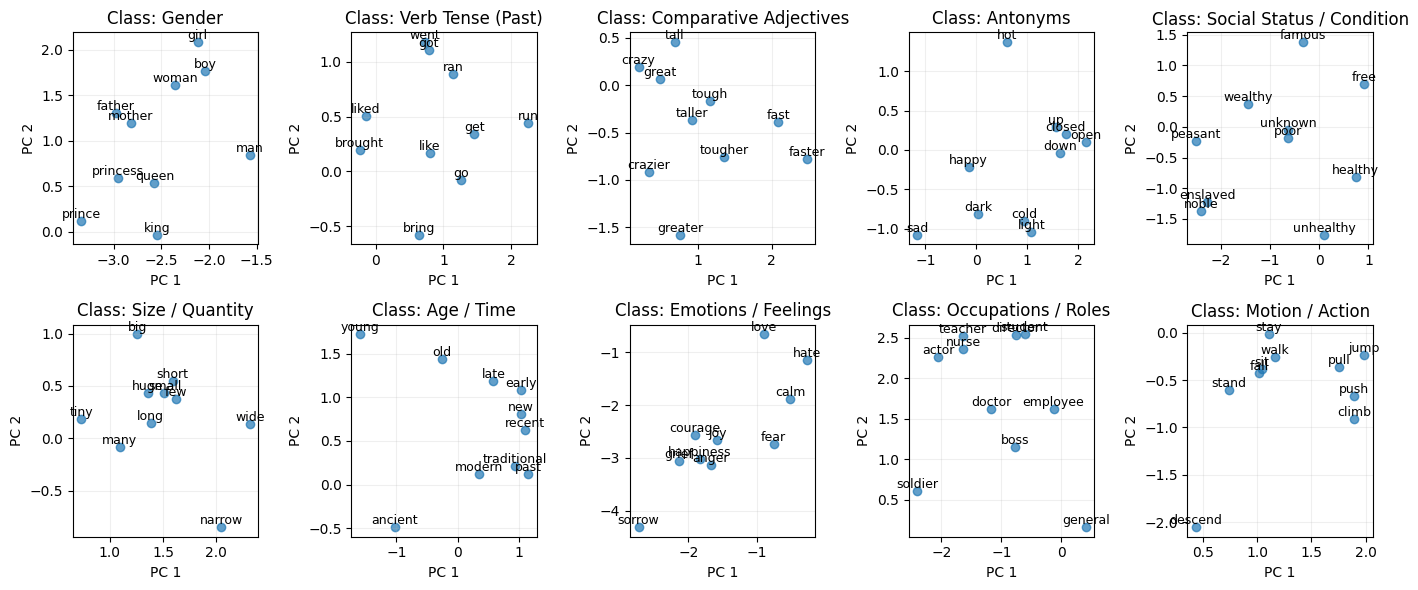

In [31]:
import matplotlib.pyplot as plt
import plotly.express as px

colors = {
    "Gender": "red",
    "Verb Tense (Past)": "blue",
    "Comparative Adjectives": "green",
    "Other": "gray",
    "Antonyms": "yellow",
    "Social Status / Condition":"pink",
    "Size / Quantity":"orange",
    "Age / Time":"black",
    "Emotions / Feelings":"brown",
    "Occupations / Roles":"magenta",
    "Motion / Action":"purple"
}

plt.figure(figsize=(14, 10))
ax = plt.gca()

for _, row in words_df.iterrows():
    color = colors.get(row["Class"], "black")  # Domyślny czarny
    ax.scatter(row["PC1"], row["PC2"], color=color, alpha=0.6)
    ax.text(row["PC1"], row["PC2"], row["Word"], 
            fontsize=9, ha='center', va='bottom', alpha=0.8)

# Tytuł i osie
plt.title("2D PCA of Word Embeddings", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Dodatkowe ulepszenia
plt.grid(alpha=0.2)
plt.tight_layout()

plt.show()





classes = words_df["Class"].unique()

fig, axes = plt.subplots(2, 5, figsize=(14, 6), squeeze=False)
axes = axes.flatten()

for idx, class_name in enumerate(classes):

    class_data = words_df[words_df["Class"] == class_name]

    axes[idx].scatter(class_data['PC1'], class_data['PC2'], alpha=0.7)

    #Etykiety
    for _, row in class_data.iterrows():
        axes[idx].text(row['PC1'], row['PC2'], row['Word'], 
                      fontsize=9, ha='center', va='bottom')
    
    axes[idx].set_title(f'Class: {class_name}')
    axes[idx].set_xlabel('PC 1')
    axes[idx].set_ylabel('PC 2')
    axes[idx].grid(alpha=0.2)

plt.tight_layout()
plt.show()